In [1]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 16pt;}
div.output { font-size: 16pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 16pt;}
div.prompt { min-width: 100px;}
</style>
"""))

In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
x = iris.iloc[:,:-1]  # 마지막 열(범주형데이터) 제외

In [6]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# 표준화 
# scale() : 표준정규분포 사용 표준화 
from sklearn.preprocessing import scale

In [8]:
x_scaled = scale(x)
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [9]:
x_scaled[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [10]:
x_scaled.mean(axis=0)

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [11]:
for scaled_mean in x_scaled.mean(axis=0):
    print("{:10.9f}".format(scaled_mean))

# 표준화 수행한 데이터 평균 출력 --> 사실 상 0에 가까운 수 

-0.000000000
-0.000000000
-0.000000000
-0.000000000


In [12]:
# 표준편차 출력
x_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [13]:
# robust_scale()
# 중위수(median)와 사분위수를 사용, 표준화 
from sklearn.preprocessing import robust_scale

In [14]:
iris_robust_scaled = robust_scale(x)

In [15]:
iris_robust_scaled[:5,:]

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333]])

In [16]:
# minmax_scale() 
# 최소값 0, 최대값 1 표준화
from sklearn.preprocessing import minmax_scale

In [17]:
iris_minmax_scaled = minmax_scale(x)

In [18]:
iris_minmax_scaled[:5,:]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [19]:
# maxabc_scale() : 절대값 기준, 가장 작은 값 0, 가장 큰 값 1 (음수는 부호 그대로 유지)
from sklearn.preprocessing import maxabs_scale

In [20]:
iris_maxabs_scaled = maxabs_scale(x)

In [21]:
iris_maxabs_scaled[:5, :]

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ]])

In [22]:
import numpy as np

In [23]:
X = np.array([[1.,-1, 2.],
              [2.,0.,0.],
              [0.,1.,-1.]])

In [24]:
X

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [25]:
minmax_scale(X)

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [26]:
maxabs_scale(X)

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

표준화 클래스

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

In [31]:
sc.fit(x)

StandardScaler()

In [32]:
iris_scaled = sc.transform(x)

In [33]:
iris_scaled[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [34]:
iris_scaled.mean(axis=0)  # 평균 0, 표준편차 1

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [35]:
iris_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [36]:
# 역 표준화
iris_origin = sc.inverse_transform(iris_scaled)

In [37]:
iris_origin[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [38]:
x.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


인코딩

In [39]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()

In [41]:
le.fit_transform(iris.species)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
species = le.fit_transform(iris.species)

In [43]:
le.classes_   # 클래스 확인

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [44]:
# 역변환
le.inverse_transform([1,2,0])

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [45]:
le.inverse_transform(species)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [46]:
# one-hot encoding 

from sklearn.preprocessing import OneHotEncoder

In [47]:
enc = OneHotEncoder()

In [48]:
import numpy as np

In [49]:
species = iris.species.to_numpy()

In [50]:
species

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [51]:
enc.fit(species.reshape(-1,1))  # 함수의 인수는 2차원이여야 함 (1, 0)

OneHotEncoder()

In [52]:
iris_onehot = enc.transform(species.reshape(-1,1))
iris_onehot  
# 결과는 희소행렬

<150x3 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [53]:
iris_onehot.toarray()[:5]  # 희소행렬을 배열로 변환

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

판다스 : get_dummies() 활용, one-hot encoding

In [54]:
import pandas as pd

In [55]:
pd.get_dummies(iris.species)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


평균값 인코딩

In [56]:
titanic = sns.load_dataset("titanic")

In [57]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [58]:
sex_mean = titanic.groupby("sex")["survived"].mean()

In [59]:
sex_mean

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [60]:
titanic["sex_mean"] = titanic["sex"].map(sex_mean)

In [61]:
titanic[["sex", "sex_mean"]].head()

,sex,sex_mean
0,male,0.188908
1,female,0.742038
2,female,0.742038
3,female,0.742038
4,male,0.188908


- 평균적으로 여자가 남자보다 1 값이 많음을 의미

In [62]:
titanic_pivot = titanic.pivot_table(columns="survived",
                                    index=titanic.index,
                                    values="sex_mean")

In [63]:
titanic_pivot.head(10)

survived,0,1
0,0.188908,NaN
1,NaN,0.742038
2,NaN,0.742038
3,NaN,0.742038
4,0.188908,NaN
5,0.188908,NaN
6,0.188908,NaN
7,0.188908,NaN
8,NaN,0.742038
9,NaN,0.742038


In [64]:
titanic_pivot.head(20)

survived,0,1
0,0.188908,NaN
1,NaN,0.742038
2,NaN,0.742038
3,NaN,0.742038
4,0.188908,NaN
5,0.188908,NaN
6,0.188908,NaN
7,0.188908,NaN
8,NaN,0.742038
9,NaN,0.742038


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

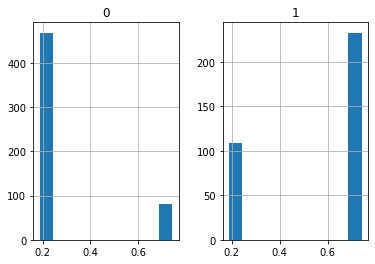

In [65]:
# 히스토그램
titanic_pivot.hist(bins=10) 

In [ ]:
# 결측값 처리 

In [66]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:,-1]

In [69]:
print(iris_X)
print()
print(iris_y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [70]:
import random
random.seed(7902)

In [71]:
# 전체 데이터 중 각 변수들에 임의의 10개 데이터를 NaN으로 변경

for col in range(4):
    rand = random.sample(range(len(iris)), 20)
    iris_X.iloc[[rand], col] = float('nan')

In [72]:
iris_X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,NaN,0.2
1,4.9,NaN,1.4,0.2
2,4.7,3.2,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,NaN,2.9,1.4,NaN
9,4.9,3.1,1.5,NaN


In [74]:
# 1) 평균으로 채우기
iris_X.mean(axis=0)

sepal_length    5.790000
sepal_width     3.073846
petal_length    3.749231
petal_width     1.226154
dtype: float64

In [75]:
from sklearn.impute import SimpleImputer

In [76]:
imp_mean = SimpleImputer(strategy="mean")

In [77]:
imp_mean.fit(iris_X)

SimpleImputer()

In [78]:
iris_new = imp_mean.transform(iris_X)

In [79]:
iris_new[:5,]

array([[5.79      , 3.5       , 3.74923077, 0.2       ],
       [4.9       , 3.07384615, 1.4       , 0.2       ],
       [4.7       , 3.2       , 3.74923077, 1.22615385],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ]])

In [80]:
# 2) 중앙값으로 채우기 
imp_median = SimpleImputer(strategy="median")
imp_median.fit(iris_X)

SimpleImputer(strategy='median')

In [81]:
iris_median = imp_median.transform(iris_X)

In [82]:
iris_median[:5,]

array([[5.7, 3.5, 4.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 4.4, 1.3],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [83]:
iris_X.median(axis=0)

sepal_length    5.7
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64

In [84]:
# 3) 최빈값으로 채우기 

iris_X.mode(axis=0)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.0,1.4,0.2
1,5.7,NaN,1.5,NaN


In [85]:
imp_mostfreq = SimpleImputer(strategy="most_frequent")

In [86]:
iris_mostfreq = imp_mostfreq.fit_transform(iris_X)

In [87]:
iris_mostfreq[:5,]

array([[5. , 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [88]:
# 4) 판다스 이용, 결측치 처리 

In [89]:
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,NaN,0.2
1,4.9,NaN,1.4,0.2
2,4.7,3.2,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
iris_y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [91]:
import pandas as pd
iris_n = pd.concat([iris_X, iris_y], axis=1)

In [92]:
iris_n.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,NaN,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,3.2,NaN,NaN,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [93]:
iris_mean_by_species = iris_n.groupby("species").mean()

In [94]:
iris_mean_by_species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006667,3.454762,1.470455,0.246341
versicolor,5.863415,2.800000,4.280952,1.322727
virginica,6.522727,2.972340,5.520455,2.024444


In [95]:
# 종(species) 별 계산될 열의 평균 이용, 결측값 변경 함수 생성
import math
def na2mean(row):
    for i in range(4):
        if(math.isnan(row[i])):
            row[i]=iris_mean_by_species.loc[row["species"], 
                                           row.index[i]]
    return row

In [96]:
iris_new = iris_n.apply(na2mean, axis=1)

In [97]:
iris_new.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.006667,3.500000,1.470455,0.200000,setosa
1,4.900000,3.454762,1.400000,0.200000,setosa
2,4.700000,3.200000,1.470455,0.246341,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa
